# Tests

## Basic tests

### Utilisation of classes

In [1]:
from class_Path import *
file_path = "./ged docs/Queen_Eliz_II.ged"

In [2]:
graph = Graph(file_path)
path = Path(file_path)

In [3]:
#graph.get_IndivLinks_DataFrame()

,CHILD1,CHILD2,CHILD3,CHILD4,CHILD5,...,UNCLE2,UNCLE3,UNCLE4,UNCLE5,UNCLE6
INDI,,,,,,,,,,,
@I101@,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
@I103@,@I101@,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
@I155@,@I622@,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
@I168@,@I386@,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
@I169@,@I386@,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
@I11259@,@I11257@,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
@I11260@,@I11259@,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN
@I11261@,@I11259@,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN


In [5]:
path.get_dij('@I11259@','@I10835@')

[['@I11257@', 'child'], ['@I11250@', 'grandchild'], ['@I11175@', 'grandchild'], ['@I11179@', 'grandchild'], ['@I11183@', 'grandchild'], ['@I8765@', 'spouse'], ['@I8761@', 'grandparent'], ['@I8756@', 'grandparent'], ['@I8752@', 'grandparent'], ['@I8745@', 'grandparent'], ['@I8748@', 'grandparent'], ['@I2216@', 'grandparent'], ['@I10835@', 'nephew']]


[36,
 'Isabella (le) is the daughter of the nephew of Thomas, who is the grand son of the nephew of the nephew of Dorothy, who is the wife of the niece of the niece of Henry (4th Lord of Groby) de, who is the grand father of the nephew of the niece of Eva, who is the grand mother of the niece of Thomas.']

## Parameters tests

In [1]:
from class_Test import *

### Queen_Eliz_II.ged

In [2]:
# /!\ Long : takes about 2 minutes /!\
test = Test("./ged docs/Queen_Eliz_II.ged")

In [3]:
test.comparison_Dataframe()

,Path,Distance,Dijkstar distance,Execution time (s),Dijkstar execution time (s),Difference of execution time (s)
Individuals,,,,,,
"[@I9347@, @I4205@]",Bethoc Beatrix MacKenneth Heiress of Scone Pri...,2,2,3.930639,3.805498,0.125141
"[@I6457@, @I4408@]",Philip (Sir) de BRAOSE (BRIOUZE) is the son of...,5,5,4.851065,5.363039,-0.511974
"[@I4304@, @I8351@]",Agnes is the grand son of the grand daughter o...,6,6,5.361813,5.217833,0.143980
"[@I8701@, @I963@]",Henry (of Roslin) ST. CLAIR (SINCLAIR) is the ...,8,8,7.605992,7.861512,-0.255520
"[@I10012@, @I10769@]",Elizabeth is the daughter of the grand daughte...,15,15,13.410365,13.616631,-0.206266


In [4]:
test.average()

(7.0319748878479, 7.172902631759643)

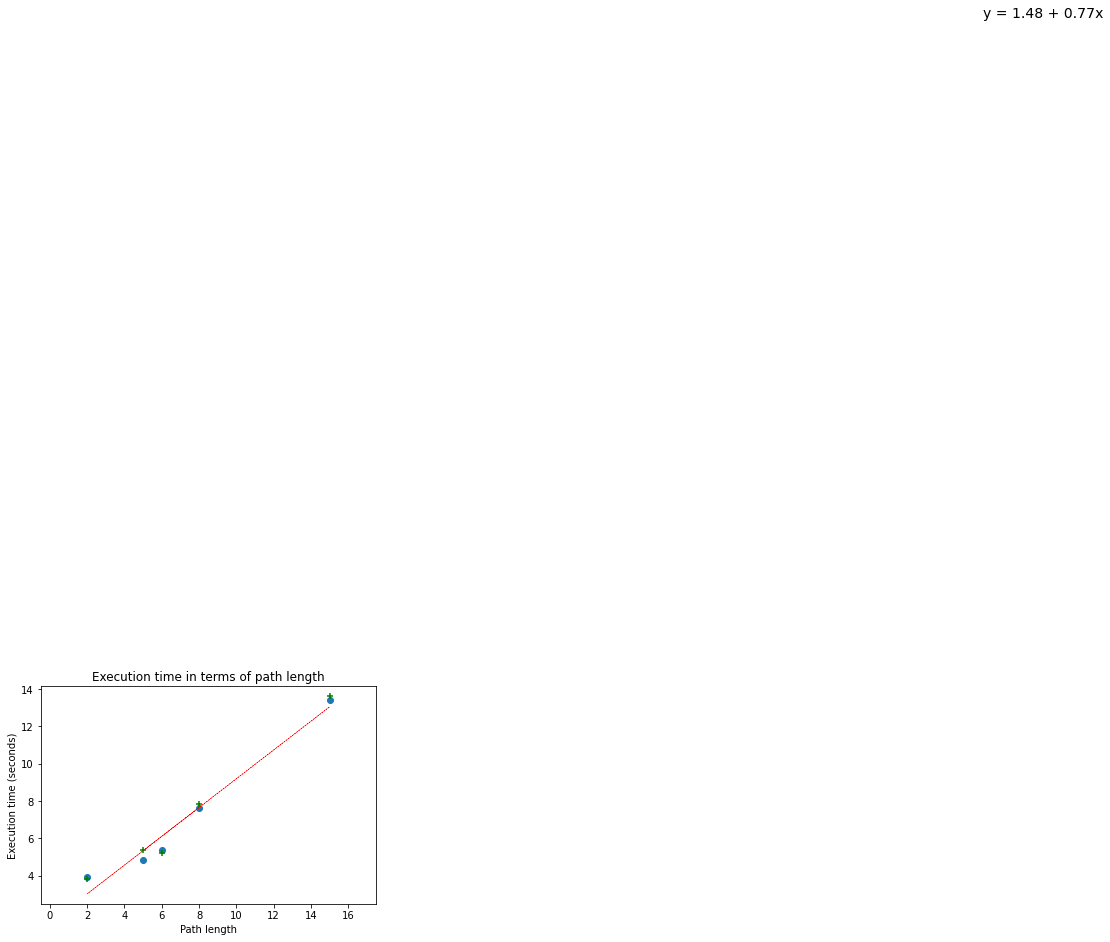

In [5]:
test.plot_Distance_Time()

In 40.0% of cases, the Dijkstra algorithm is faster.


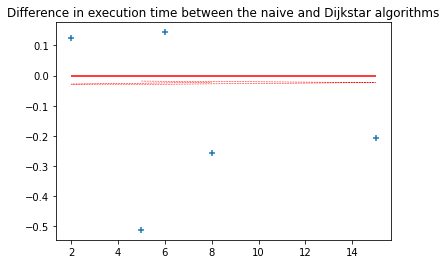

In [6]:
test.plot_difference()

## Validation 

In [6]:
from gedcom.element.individual import IndividualElement
from gedcom.parser import Parser
from class_Path import *

gedcom_parser = Parser()

file_path = './ged docs/Queen_Eliz_II.ged'
gedcom_parser = Parser()
gedcom_parser.parse_file(file_path)
root_child_elements = gedcom_parser.get_root_child_elements()

def find_IndividualElement(first_name,last_name):
    """
    Get Individual element of ged with first names and last name

    Parameters
    ---
    first_names : str
        complete first names of the individual
    last_name : str
        last names of the individual 

    Returns 
    ---
    bool 
        Tells if the individual was found
    IndividualElement
        IndividualElement corresponding to the individual in the ged

    """
    for element in root_child_elements:
        if isinstance(element, IndividualElement):
            if element.surname_match(last_name) and element.given_name_match(first_name):
                return (True, element)
    return [False, element]

ind1 = find_IndividualElement("Elizabeth II Alexandra Mary","Windsor")[1].get_pointer()
ind2 = find_IndividualElement("George V", "Windsor")[1].get_pointer()

path = Path(file_path)
length, way = path.shortest_path(ind1,ind2)[1][0]

print(f"{ind2} is the {way[1]} of {ind1} and {ind2} is {way[0].get_gender()}")

(3, [['@I3024@', 'grandparent']])
